In [35]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

from scipy.optimize import minimize
import nevergrad as ng

from utils import function

In [131]:
data = function.gen_regression_symbolic(m='x1**2+2', n_samples=1000, n_features=2, noise=0.0, noise_dist='normal')

## Data

In [132]:
df = pd.DataFrame(columns=['Temprerature','ProductionYield'], dtype=float)

In [133]:
df['Temprerature'] = data[:, 0]
df['ProductionYield'] = data[:, 1]

df['Temprerature'] = df['Temprerature'].astype(float)
df['ProductionYield'] = df['ProductionYield'].astype(float)
# df['ProductionYield']= df['ProductionYield'].clip(0, 100)

In [134]:
print(df.head())

   Temprerature  ProductionYield
0      2.458147         8.042487
1      0.121587         2.014783
2      2.017948         6.072116
3      1.862262         5.468019
4      1.912236         5.656645


In [135]:
df.describe()

,Temprerature,ProductionYield
count,1000.000000,1000.000000
mean,-0.000418,25.884492
std,4.889622,35.551876
min,-16.708343,2.000222
25%,-3.072995,4.138732
50%,-0.153912,11.843358
75%,3.225999,32.397811
max,14.276552,281.168720


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temprerature     1000 non-null   float64
 1   ProductionYield  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


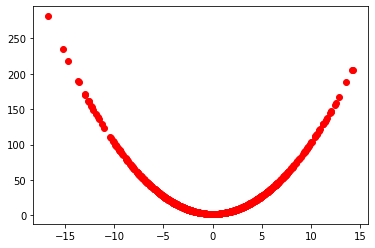

In [181]:
plt.plot(df['Temprerature'], df['ProductionYield'], 'ro')

## Prediction algorithm

In [182]:
# normalize the input data
X = df['Temprerature'].values
y = df['ProductionYield'].values

X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.mean()) / y.std()


x_train, x_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

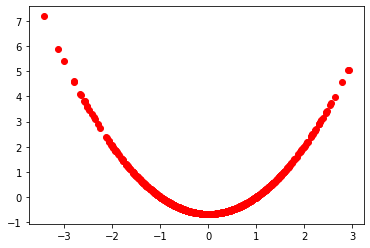

In [183]:
plt.plot(X_norm, y_norm, 'ro')

In [184]:
def build_model():
    
    # create model
    model = tf.keras.Sequential()
    
    model.add(layers.Dense(64, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))

    model.add(layers.Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.6))

    model.add(layers.Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))

    model.add(layers.Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [185]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0, 15])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [186]:
model = build_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 64)                128       
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_24 (Dropout)        (None, 128)             

In [187]:
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    verbose=2, epochs=600)

Epoch 1/600
20/20 - 2s - loss: 0.6315 - val_loss: 0.6201 - 2s/epoch - 80ms/step
Epoch 2/600
20/20 - 0s - loss: 0.3356 - val_loss: 0.6205 - 94ms/epoch - 5ms/step
Epoch 3/600
20/20 - 0s - loss: 0.3242 - val_loss: 0.6257 - 125ms/epoch - 6ms/step
Epoch 4/600
20/20 - 0s - loss: 0.3312 - val_loss: 0.6311 - 107ms/epoch - 5ms/step
Epoch 5/600
20/20 - 0s - loss: 0.3424 - val_loss: 0.6369 - 110ms/epoch - 6ms/step
Epoch 6/600
20/20 - 0s - loss: 0.3293 - val_loss: 0.6444 - 128ms/epoch - 6ms/step
Epoch 7/600
20/20 - 0s - loss: 0.3208 - val_loss: 0.6549 - 126ms/epoch - 6ms/step
Epoch 8/600
20/20 - 0s - loss: 0.2431 - val_loss: 0.6668 - 110ms/epoch - 5ms/step
Epoch 9/600
20/20 - 0s - loss: 0.2543 - val_loss: 0.6536 - 104ms/epoch - 5ms/step
Epoch 10/600
20/20 - 0s - loss: 0.2772 - val_loss: 0.6527 - 112ms/epoch - 6ms/step
Epoch 11/600
20/20 - 0s - loss: 0.2328 - val_loss: 0.6579 - 101ms/epoch - 5ms/step
Epoch 12/600
20/20 - 0s - loss: 0.2275 - val_loss: 0.6452 - 130ms/epoch - 7ms/step
Epoch 13/600
20/

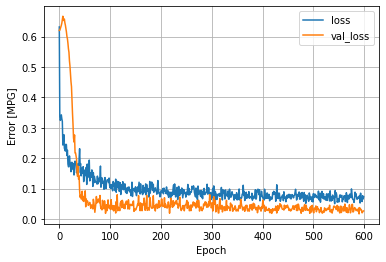

In [188]:
plot_loss(history)

In [189]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(x_test))

0.9656911093912177

In [190]:
df

,Temprerature,ProductionYield
0,2.458147,8.042487
1,0.121587,2.014783
2,2.017948,6.072116
3,1.862262,5.468019
4,1.912236,5.656645
...,...,...
995,-2.150253,6.623588
996,1.088460,3.184745
997,-3.074137,11.450319
998,-4.032575,18.261661


In [193]:
tp_indx = 6
print(f"real value: {y_test[tp_indx]}, model predicted: {model.predict(x_test[tp_indx].reshape(1,-1))}")

real value: -0.6168544613540222, model predicted: [[-0.5571446]]


## Multi-dimensional optimization

### 'Nelder-Mead'

In [194]:
def wrapper(x, *args) -> float:
    
    network_input = x.reshape(1,-1)
    network_output = model.predict(network_input, *args)
    scipy_output = float(network_output)
    
    if (scipy_output > 0) & (scipy_output < 110):
        return -scipy_output
    
    else:
        return 1000000

In [195]:
x0 = x_train[-1].reshape(1,-1)
res = minimize(wrapper, x0, method='Nelder-Mead', tol=1e-6)

In [198]:
x0

array([[1.08285692]])

In [196]:
res

 final_simplex: (array([[17.18801724],
       [17.18801806]]), array([-109.99998474, -109.99998474]))
           fun: -109.99998474121094
       message: 'Optimization terminated successfully.'
          nfev: 86
           nit: 43
        status: 0
       success: True
             x: array([17.18801724])

In [197]:
model.predict(res.x.reshape(1,-1))

array([[109.999985]], dtype=float32)

### Bound 'L-BFGS-B'

In [207]:
x0

array([[0.39530712]])

In [205]:
x0 = x_train[-5].reshape(1,-1)
bnds = ((-3, 3))
res = minimize(wrapper, x0, method='L-BFGS-B',bounds=None, tol=1e-6)

In [206]:
res

      fun: 1000000
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.39530712])

In [281]:
model.predict(res.x.reshape(1,-1))

array([[50.364445]], dtype=float32)